## EDA

Hacemos una exploracion sencilla de los datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "../data/fraud_train.csv"
df = pd.read_csv(data_path)

In [2]:
pd.set_option('display.max_columns', None)
display(df.head())

,ID,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,CL00007646,Aug,4,Friday,Honda,Urban,Monday,Aug,5,Male,Married,Policy Holder,Sedan - All Perils,Sedan,30000 to 39000,0,400,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,4 to 8 years,2 vehicles,1994,All Perils
1,CL00009711,Dec,2,Tuesday,Chevrolet,Urban,Wednesday,Dec,3,Female,Single,Third Party,Sedan - Collision,Sedan,20000 to 29000,0,400,more than 30,more than 30,2 to 4,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
2,CL00010809,Feb,2,Sunday,Chevrolet,Urban,Monday,Feb,3,Male,Single,Policy Holder,Sedan - Liability,Sport,20000 to 29000,0,400,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1994,Liability
3,CL00012496,Jun,3,Tuesday,Pontiac,Urban,Thursday,Jul,4,Male,Married,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,0,400,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
4,CL00015396,Jan,2,Sunday,Toyota,Rural,Thursday,Jan,3,Male,Single,Policy Holder,Sedan - All Perils,Sedan,less than 20000,1,400,more than 30,more than 30,none,6 years,36 to 40,No,No,External,none,no change,1 vehicle,1994,All Perils


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    5000 non-null   object
 1   Month                 5000 non-null   object
 2   WeekOfMonth           5000 non-null   int64 
 3   DayOfWeek             5000 non-null   object
 4   Make                  5000 non-null   object
 5   AccidentArea          5000 non-null   object
 6   DayOfWeekClaimed      5000 non-null   object
 7   MonthClaimed          5000 non-null   object
 8   WeekOfMonthClaimed    5000 non-null   int64 
 9   Sex                   5000 non-null   object
 10  MaritalStatus         5000 non-null   object
 11  Fault                 5000 non-null   object
 12  PolicyType            5000 non-null   object
 13  VehicleCategory       5000 non-null   object
 14  VehiclePrice          5000 non-null   object
 15  FraudFound_P          5000 non-null   

In [4]:
unique_counts = df.nunique()
display(unique_counts)

ID                      5000
Month                     12
WeekOfMonth                5
DayOfWeek                  7
Make                      18
AccidentArea               2
DayOfWeekClaimed           8
MonthClaimed              13
WeekOfMonthClaimed         5
Sex                        2
MaritalStatus              4
Fault                      2
PolicyType                 9
VehicleCategory            3
VehiclePrice               6
FraudFound_P               2
Deductible                 4
Days_Policy_Accident       5
Days_Policy_Claim          4
PastNumberOfClaims         4
AgeOfVehicle               8
AgeOfPolicyHolder          9
PoliceReportFiled          2
WitnessPresent             2
AgentType                  2
NumberOfSuppliments        4
AddressChange_Claim        5
NumberOfCars               4
Year                       3
BasePolicy                 3
dtype: int64

In [5]:
df.drop(columns=['ID'], inplace=True)

In [6]:
dup_rows = df.duplicated().sum()
print(f"Número de filas duplicadas completas: {dup_rows}")

Número de filas duplicadas completas: 0


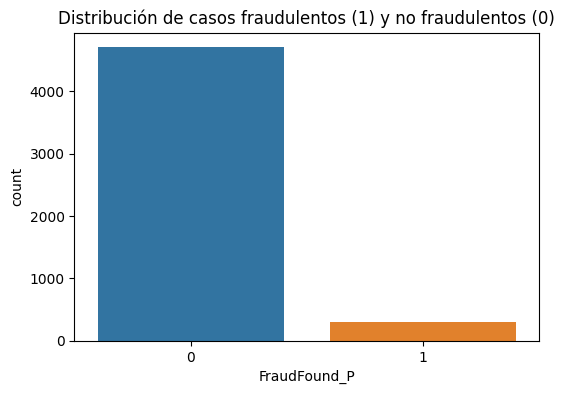

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='FraudFound_P')
plt.title('Distribución de casos fraudulentos (1) y no fraudulentos (0)')
plt.show()

In [8]:
fraud_counts = df['FraudFound_P'].value_counts()
print(f"Porcentaje fraude: {fraud_counts[1] / fraud_counts.sum() * 100:.2f}%")

Porcentaje fraude: 5.84%


In [9]:
cat_columns =  [col for col in df.columns if col != 'FraudFound_P']

In [10]:
for col in cat_columns:
    print(col)
    print(df[col].unique())

Month
['Aug' 'Dec' 'Feb' 'Jun' 'Jan' 'Nov' 'Jul' 'May' 'Oct' 'Sep' 'Mar' 'Apr']
WeekOfMonth
[4 2 3 1 5]
DayOfWeek
['Friday' 'Tuesday' 'Sunday' 'Monday' 'Thursday' 'Wednesday' 'Saturday']
Make
['Honda' 'Chevrolet' 'Pontiac' 'Toyota' 'Mazda' 'Ford' 'Accura' 'Mercury'
 'VW' 'Saturn' 'Dodge' 'Saab' 'BMW' 'Nisson' 'Porche' 'Ferrari' 'Jaguar'
 'Mecedes']
AccidentArea
['Urban' 'Rural']
DayOfWeekClaimed
['Monday' 'Wednesday' 'Thursday' 'Tuesday' 'Friday' 'Saturday' 'Sunday'
 '0']
MonthClaimed
['Aug' 'Dec' 'Feb' 'Jul' 'Jan' 'Jun' 'Nov' 'Oct' 'Mar' 'May' 'Sep' 'Apr'
 '0']
WeekOfMonthClaimed
[5 3 4 2 1]
Sex
['Male' 'Female']
MaritalStatus
['Married' 'Single' 'Divorced' 'Widow']
Fault
['Policy Holder' 'Third Party']
PolicyType
['Sedan - All Perils' 'Sedan - Collision' 'Sedan - Liability'
 'Sport - Collision' 'Utility - All Perils' 'Utility - Collision'
 'Utility - Liability' 'Sport - All Perils' 'Sport - Liability']
VehicleCategory
['Sedan' 'Sport' 'Utility']
VehiclePrice
['30000 to 39000' '20000 

In [11]:
df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].replace('0', 'not claimed')
df['MonthClaimed'] = df['MonthClaimed'].replace('0', 'not claimed')


Fraude por categoría en 'Month':


FraudFound_P,0,1
Month,,
Apr,0.952038,0.047962
Aug,0.930636,0.069364
Dec,0.961538,0.038462
Feb,0.935162,0.064838
Jan,0.928105,0.071895
Jul,0.950119,0.049881
Jun,0.944724,0.055276
Mar,0.913832,0.086168
May,0.932609,0.067391


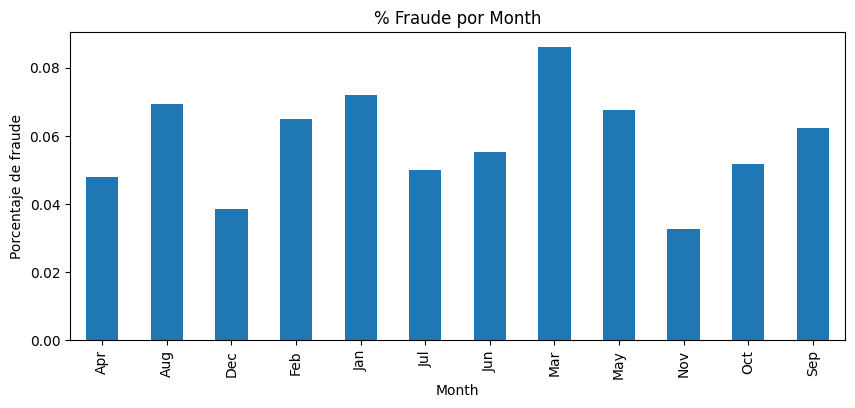


Fraude por categoría en 'WeekOfMonth':


FraudFound_P,0,1
WeekOfMonth,,
1,0.947467,0.052533
2,0.942637,0.057363
3,0.940052,0.059948
4,0.933579,0.066421
5,0.947269,0.052731


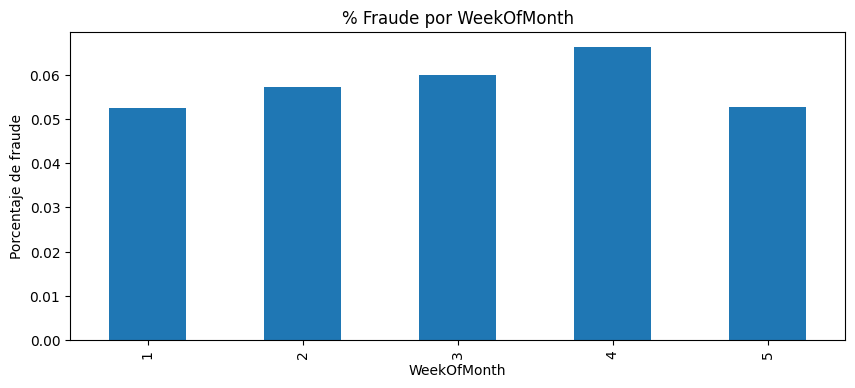


Fraude por categoría en 'DayOfWeek':


FraudFound_P,0,1
DayOfWeek,,
Friday,0.943372,0.056628
Monday,0.939535,0.060465
Saturday,0.924559,0.075441
Sunday,0.930508,0.069492
Thursday,0.953757,0.046243
Tuesday,0.947299,0.052701
Wednesday,0.948498,0.051502


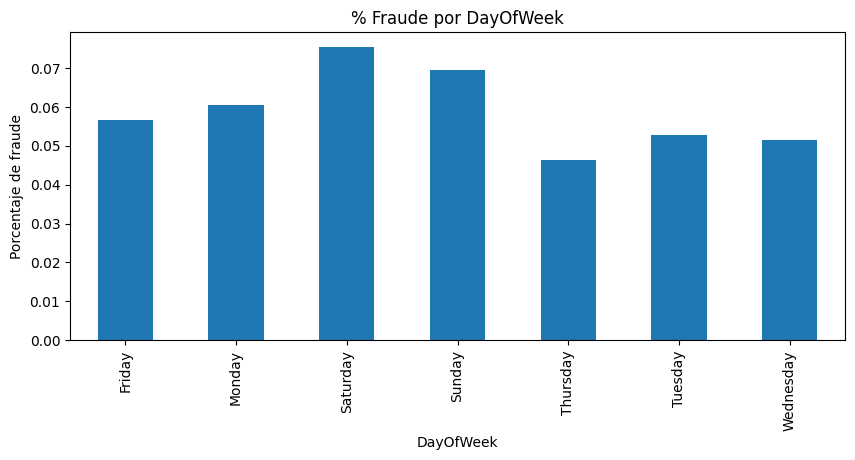


Fraude por categoría en 'Make':


FraudFound_P,0,1
Make,,
Accura,0.918750,0.081250
BMW,1.000000,0.000000
Chevrolet,0.956364,0.043636
Dodge,0.969697,0.030303
Ferrari,1.000000,0.000000
Ford,0.924658,0.075342
Honda,0.947195,0.052805
Jaguar,1.000000,0.000000
Mazda,0.937008,0.062992


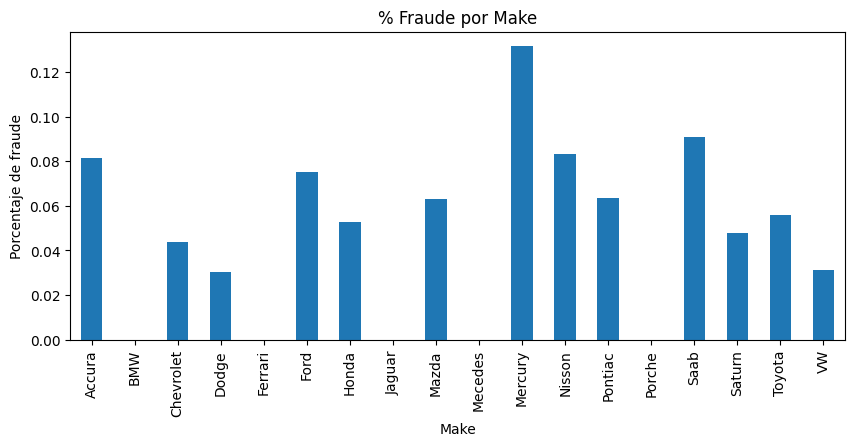


Fraude por categoría en 'AccidentArea':


FraudFound_P,0,1
AccidentArea,,
Rural,0.912381,0.087619
Urban,0.945028,0.054972


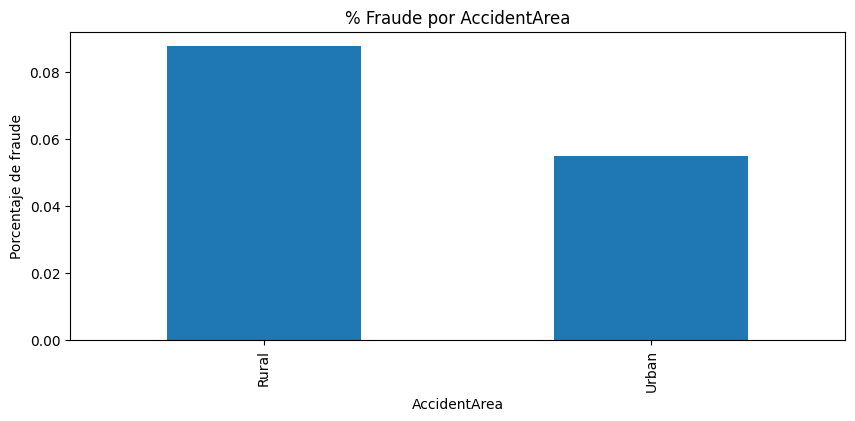


Fraude por categoría en 'DayOfWeekClaimed':


FraudFound_P,0,1
DayOfWeekClaimed,,
Friday,0.937576,0.062424
Monday,0.948887,0.051113
Saturday,0.897436,0.102564
Sunday,0.950000,0.050000
Thursday,0.939080,0.060920
Tuesday,0.937273,0.062727
Wednesday,0.944681,0.055319
not claimed,1.000000,0.000000


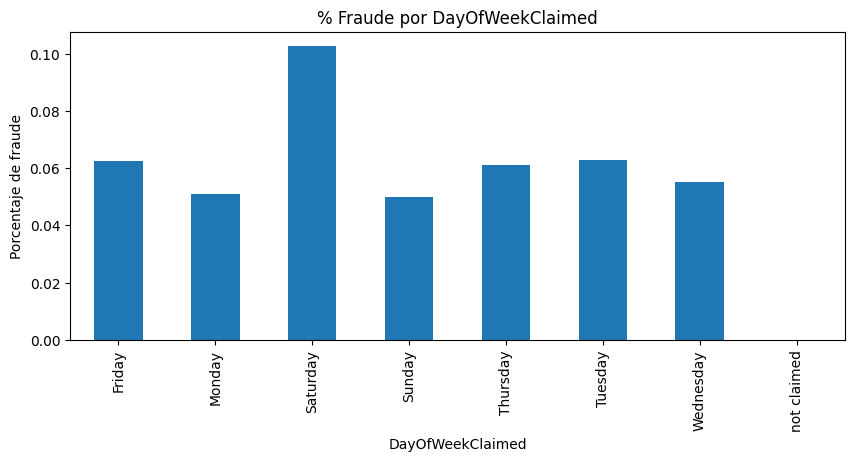


Fraude por categoría en 'MonthClaimed':


FraudFound_P,0,1
MonthClaimed,,
Apr,0.941748,0.058252
Aug,0.915493,0.084507
Dec,0.961929,0.038071
Feb,0.941748,0.058252
Jan,0.926503,0.073497
Jul,0.962217,0.037783
Jun,0.948718,0.051282
Mar,0.925170,0.074830
May,0.926931,0.073069


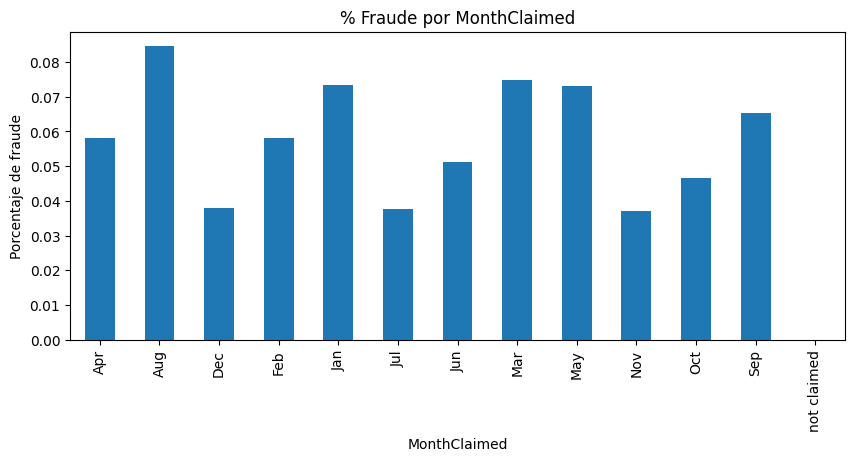


Fraude por categoría en 'WeekOfMonthClaimed':


FraudFound_P,0,1
WeekOfMonthClaimed,,
1,0.938704,0.061296
2,0.957393,0.042607
3,0.939138,0.060862
4,0.932595,0.067405
5,0.934177,0.065823


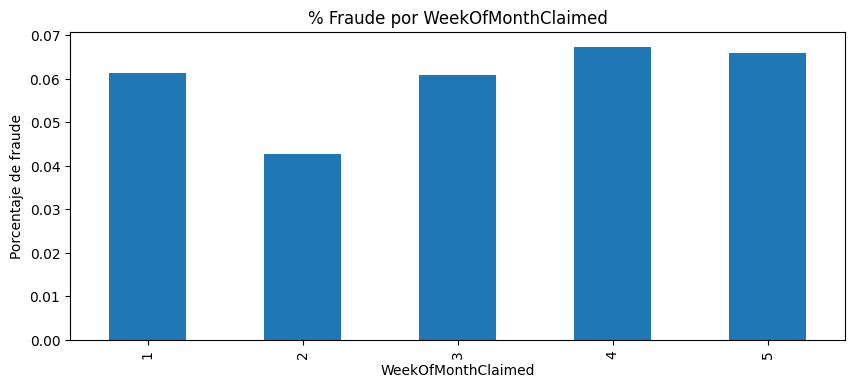


Fraude por categoría en 'Sex':


FraudFound_P,0,1
Sex,,
Female,0.955640,0.044360
Male,0.938969,0.061031


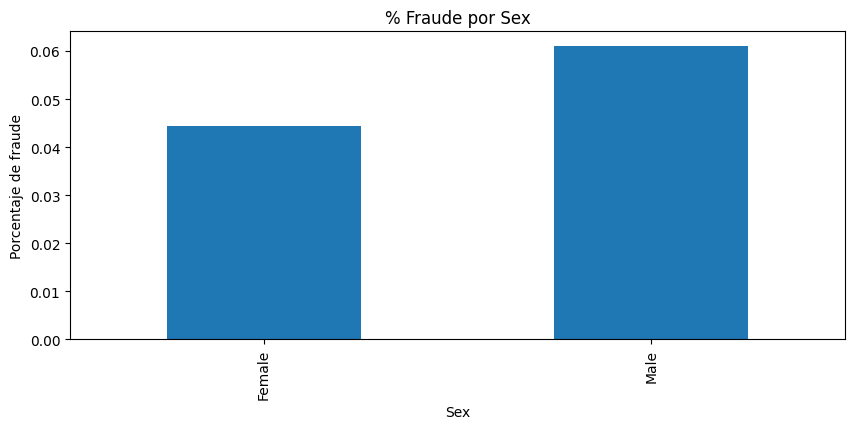


Fraude por categoría en 'MaritalStatus':


FraudFound_P,0,1
MaritalStatus,,
Divorced,1.000000,0.000000
Married,0.944673,0.055327
Single,0.934017,0.065983
Widow,0.900000,0.100000


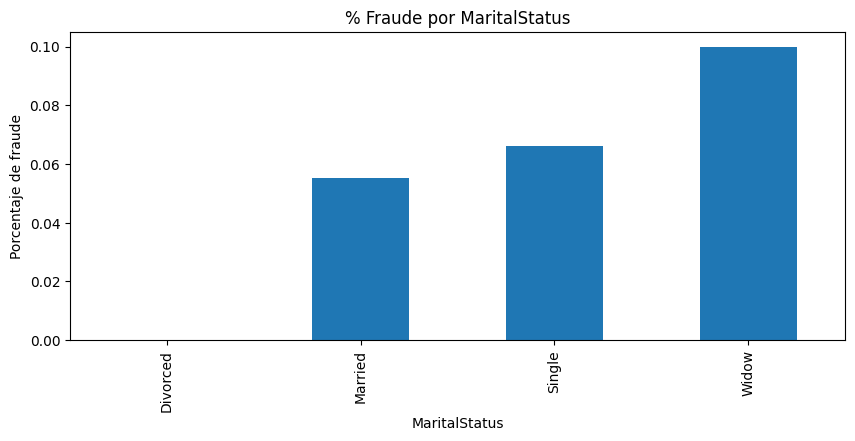


Fraude por categoría en 'Fault':


FraudFound_P,0,1
Fault,,
Policy Holder,0.921768,0.078232
Third Party,0.994842,0.005158


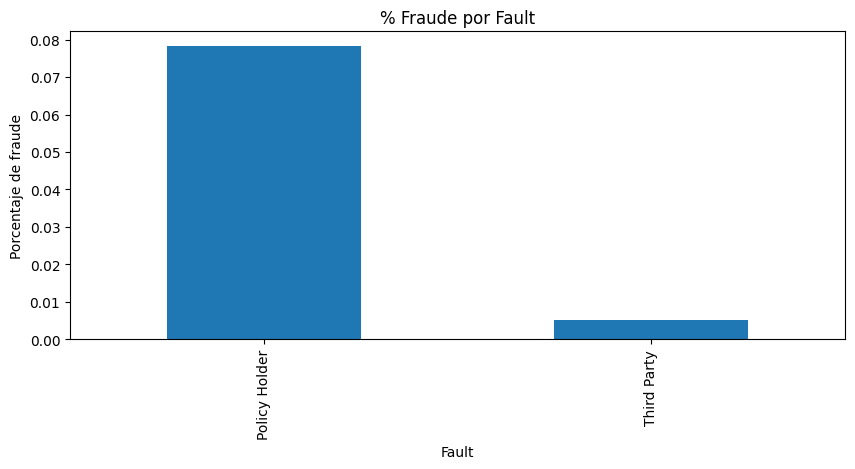


Fraude por categoría en 'PolicyType':


FraudFound_P,0,1
PolicyType,,
Sedan - All Perils,0.899475,0.100525
Sedan - Collision,0.931499,0.068501
Sedan - Liability,0.991427,0.008573
Sport - All Perils,1.000000,0.000000
Sport - Collision,0.909091,0.090909
Sport - Liability,1.000000,0.000000
Utility - All Perils,0.892857,0.107143
Utility - Collision,1.000000,0.000000
Utility - Liability,1.000000,0.000000


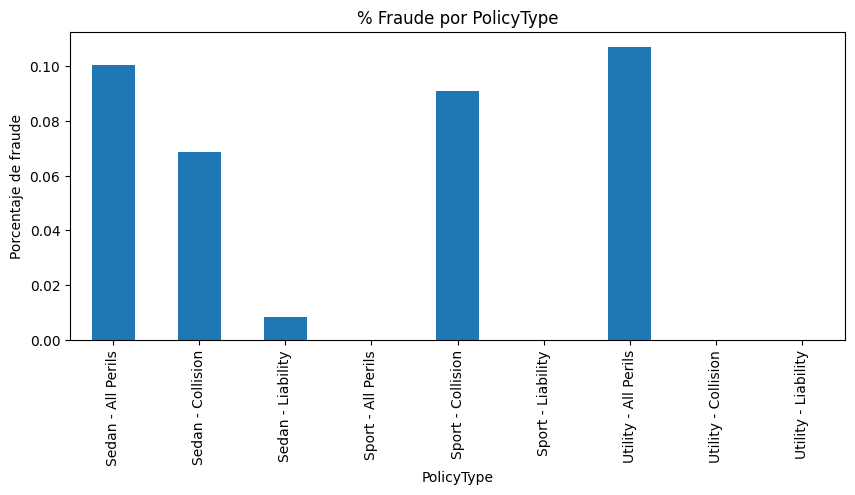


Fraude por categoría en 'VehicleCategory':


FraudFound_P,0,1
VehicleCategory,,
Sedan,0.917791,0.082209
Sport,0.986301,0.013699
Utility,0.910448,0.089552


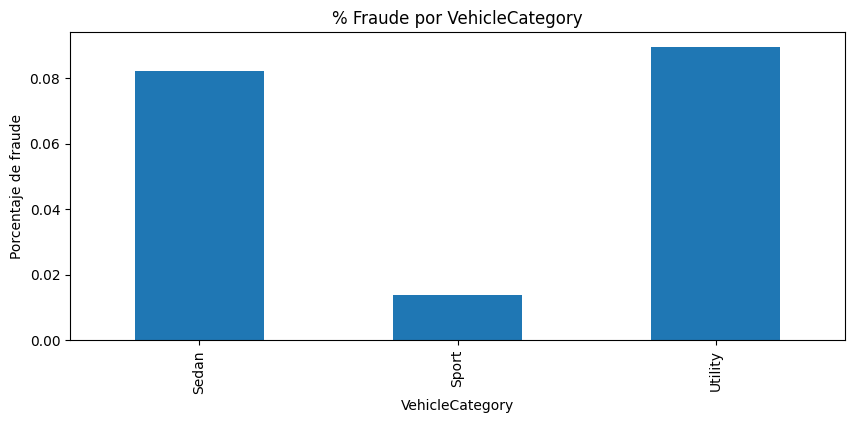


Fraude por categoría en 'VehiclePrice':


FraudFound_P,0,1
VehiclePrice,,
20000 to 29000,0.948276,0.051724
30000 to 39000,0.947684,0.052316
40000 to 59000,0.930818,0.069182
60000 to 69000,0.965517,0.034483
less than 20000,0.891429,0.108571
more than 69000,0.932945,0.067055


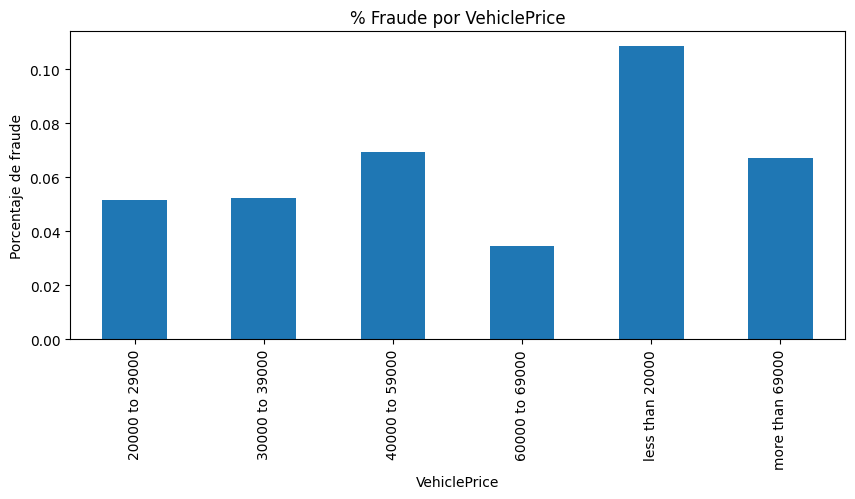


Fraude por categoría en 'Deductible':


FraudFound_P,0,1
Deductible,,
300,1.000000,0.000000
400,0.943809,0.056191
500,0.823529,0.176471
700,0.934579,0.065421


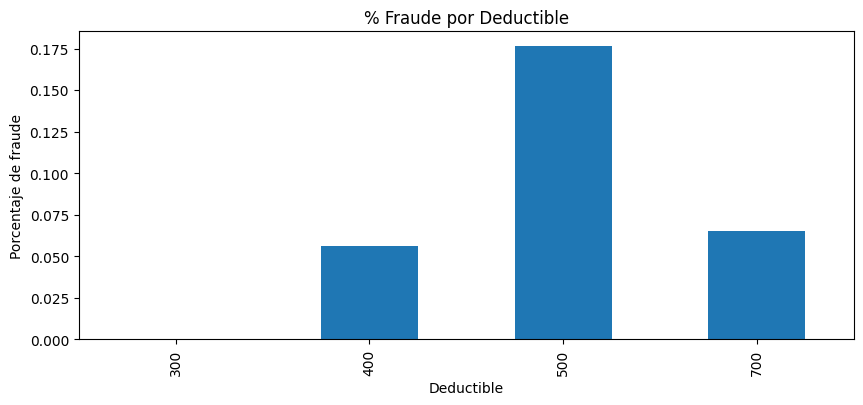


Fraude por categoría en 'Days_Policy_Accident':


FraudFound_P,0,1
Days_Policy_Accident,,
1 to 7,1.000000,0.000000
15 to 30,0.866667,0.133333
8 to 15,0.866667,0.133333
more than 30,0.942343,0.057657
none,0.869565,0.130435


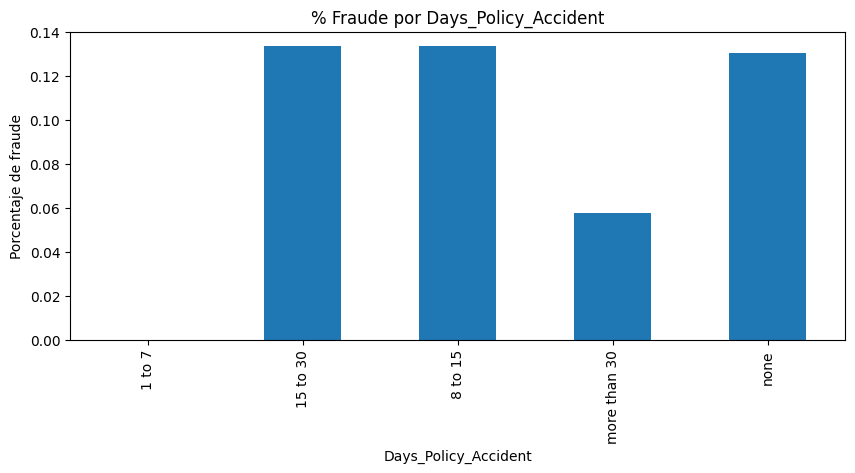


Fraude por categoría en 'Days_Policy_Claim':


FraudFound_P,0,1
Days_Policy_Claim,,
15 to 30,0.823529,0.176471
8 to 15,0.875000,0.125000
more than 30,0.942099,0.057901
none,1.000000,0.000000


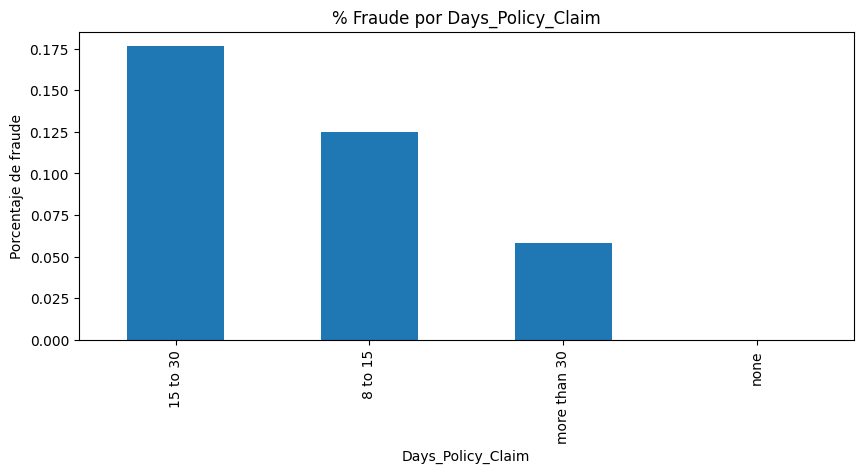


Fraude por categoría en 'PastNumberOfClaims':


FraudFound_P,0,1
PastNumberOfClaims,,
1,0.945159,0.054841
2 to 4,0.940767,0.059233
more than 4,0.964018,0.035982
none,0.929363,0.070637


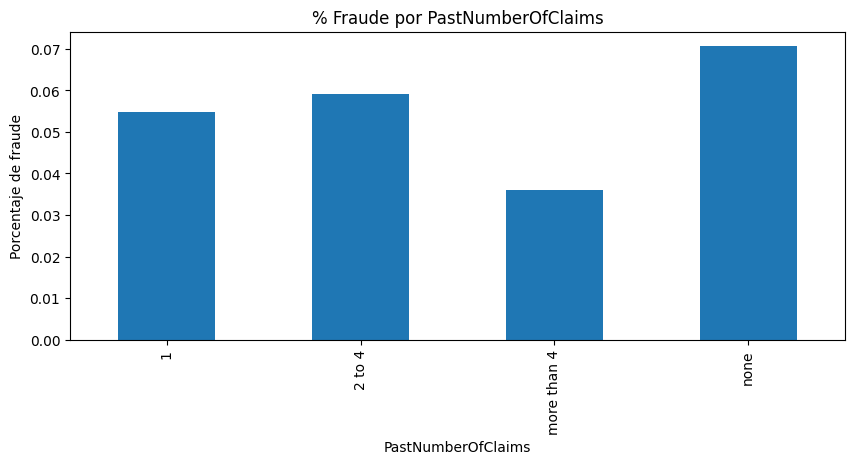


Fraude por categoría en 'AgeOfVehicle':


FraudFound_P,0,1
AgeOfVehicle,,
2 years,1.000000,0.000000
3 years,0.951220,0.048780
4 years,0.901408,0.098592
5 years,0.916854,0.083146
6 years,0.932633,0.067367
7 years,0.949468,0.050532
more than 7,0.950394,0.049606
new,0.914062,0.085938


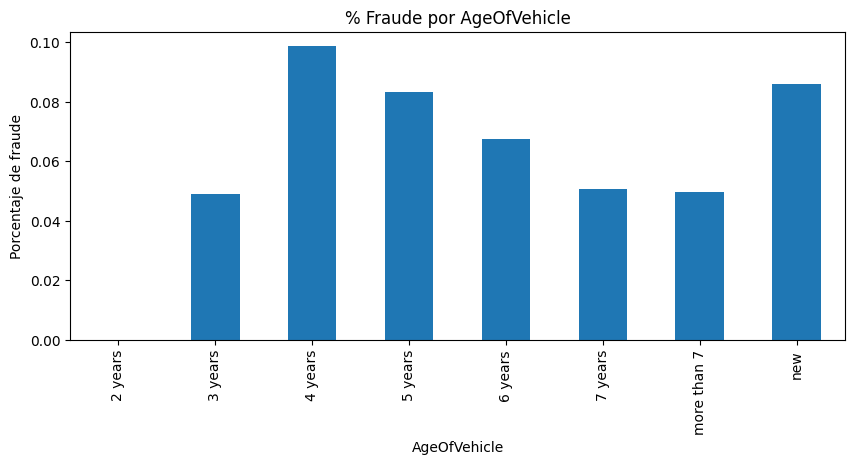


Fraude por categoría en 'AgeOfPolicyHolder':


FraudFound_P,0,1
AgeOfPolicyHolder,,
16 to 17,0.903509,0.096491
18 to 20,0.750000,0.250000
21 to 25,1.000000,0.000000
26 to 30,0.930000,0.070000
31 to 35,0.934620,0.065380
36 to 40,0.939655,0.060345
41 to 50,0.954343,0.045657
51 to 65,0.959551,0.040449
over 65,0.954286,0.045714


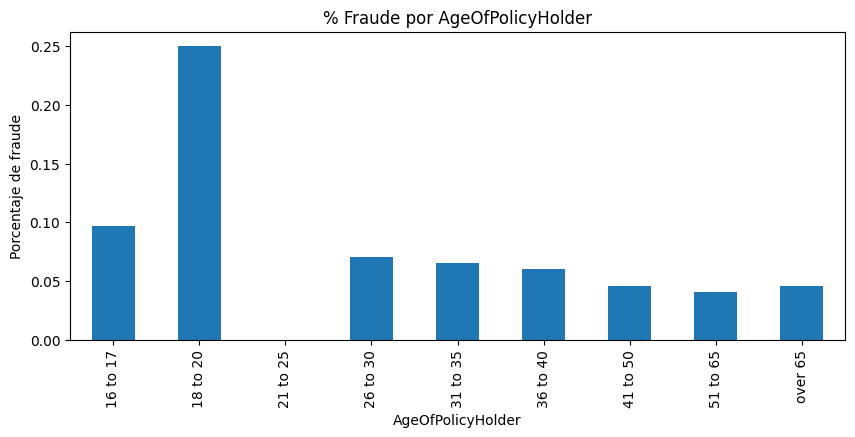


Fraude por categoría en 'PoliceReportFiled':


FraudFound_P,0,1
PoliceReportFiled,,
No,0.940584,0.059416
Yes,0.977941,0.022059


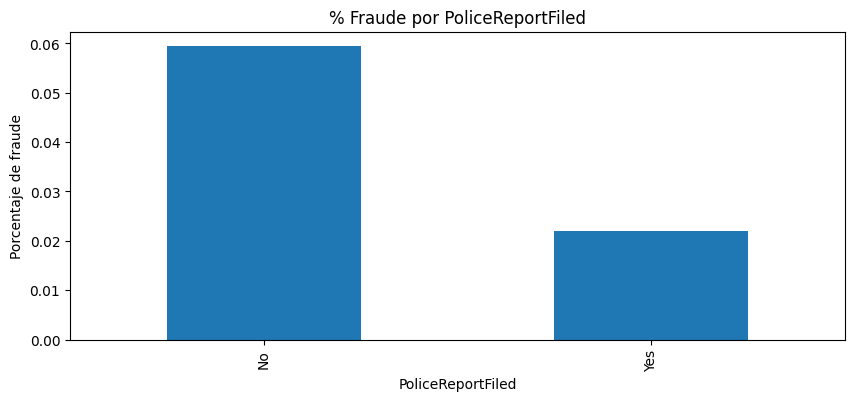


Fraude por categoría en 'WitnessPresent':


FraudFound_P,0,1
WitnessPresent,,
No,0.941603,0.058397
Yes,0.941176,0.058824


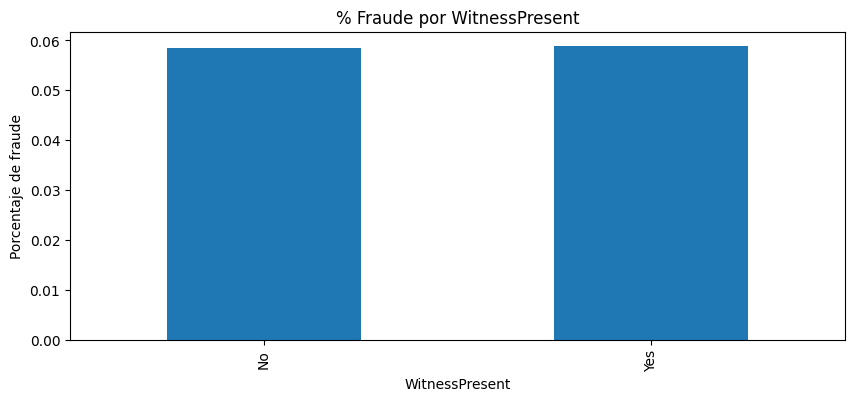


Fraude por categoría en 'AgentType':


FraudFound_P,0,1
AgentType,,
External,0.940709,0.059291
Internal,0.989130,0.010870


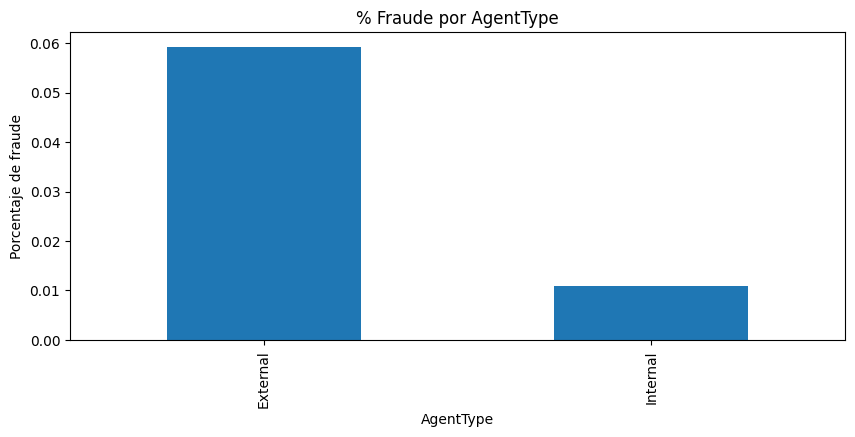


Fraude por categoría en 'NumberOfSuppliments':


FraudFound_P,0,1
NumberOfSuppliments,,
1 to 2,0.931421,0.068579
3 to 5,0.941896,0.058104
more than 5,0.957997,0.042003
none,0.936253,0.063747


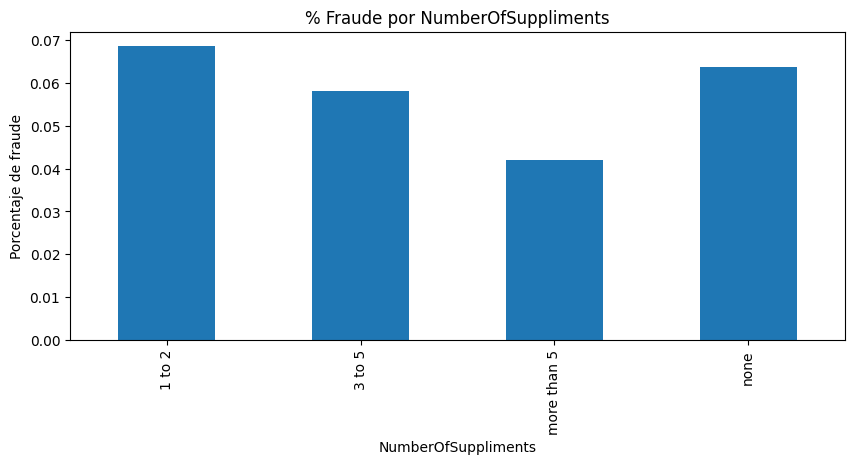


Fraude por categoría en 'AddressChange_Claim':


FraudFound_P,0,1
AddressChange_Claim,,
1 year,0.907692,0.092308
2 to 3 years,0.835165,0.164835
4 to 8 years,0.944700,0.055300
no change,0.944228,0.055772
under 6 months,0.000000,1.000000


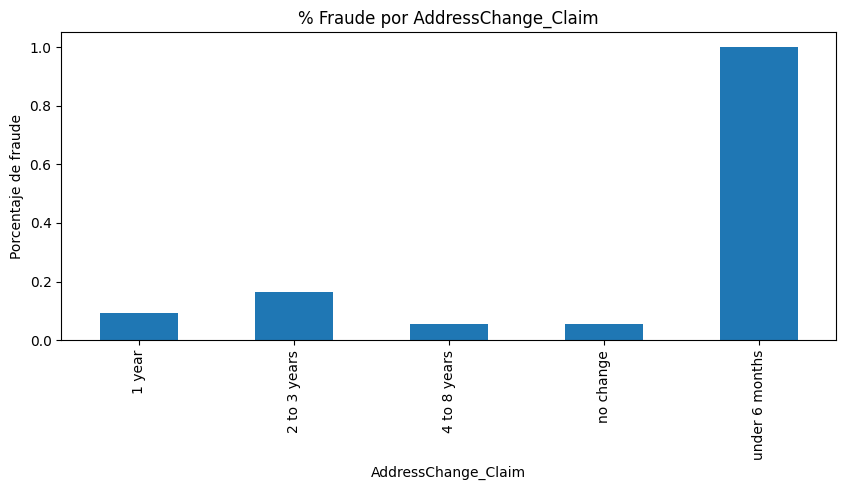


Fraude por categoría en 'NumberOfCars':


FraudFound_P,0,1
NumberOfCars,,
1 vehicle,0.941848,0.058152
2 vehicles,0.934694,0.065306
3 to 4,0.944954,0.055046
5 to 8,1.000000,0.000000


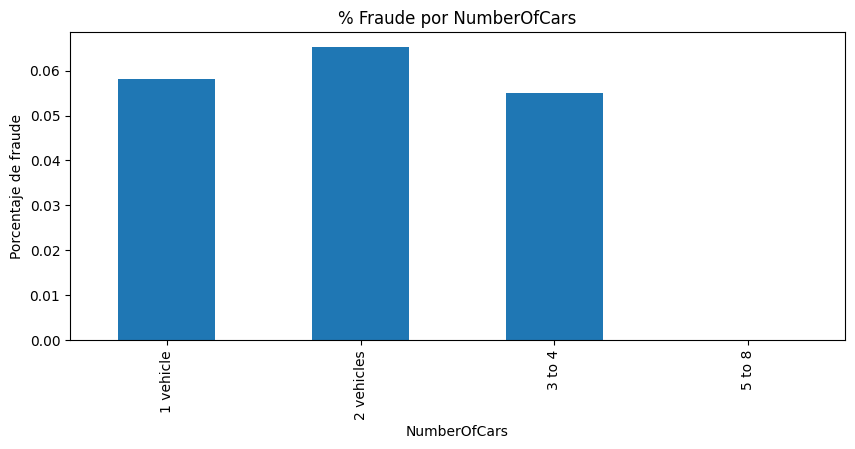


Fraude por categoría en 'Year':


FraudFound_P,0,1
Year,,
1994,0.935321,0.064679
1995,0.943761,0.056239
1996,0.948250,0.051750


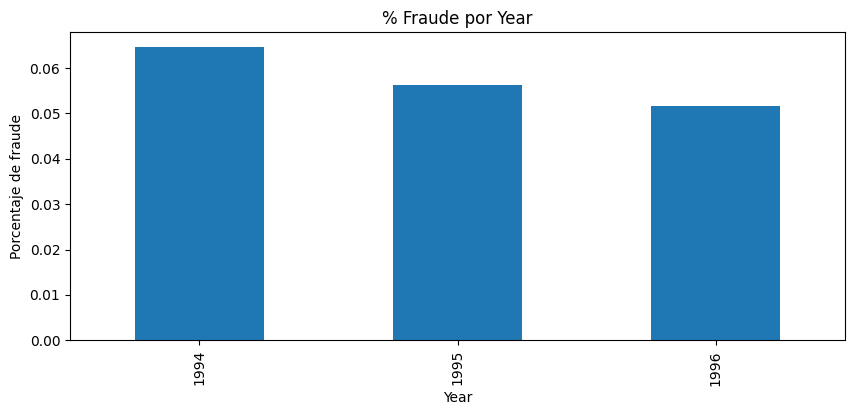


Fraude por categoría en 'BasePolicy':


FraudFound_P,0,1
BasePolicy,,
All Perils,0.899518,0.100482
Collision,0.930636,0.069364
Liability,0.991484,0.008516


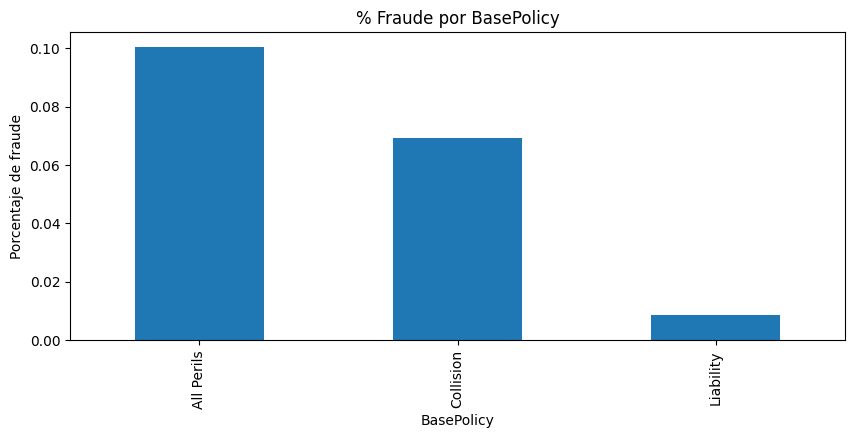

In [12]:
for col in cat_columns:
    ct = pd.crosstab(df[col], df['FraudFound_P'], normalize='index')
    print(f"\nFraude por categoría en '{col}':")
    display(ct)

    fraud_pct = ct[1]
    fraud_pct.plot(kind='bar', figsize=(10,4), title=f'% Fraude por {col}')
    plt.ylabel('Porcentaje de fraude')
    plt.show()

In [13]:
for col in df.columns:
    grouped = df.groupby(col).agg(
        count=(col, 'size'),
        fraud_rate=("FraudFound_P", 'mean')
    ).sort_values(by='fraud_rate', ascending=False)
    
    print(col)
    print(grouped)

Month
       count  fraud_rate
Month                   
Mar      441    0.086168
Jan      459    0.071895
Aug      346    0.069364
May      460    0.067391
Feb      401    0.064838
Sep      417    0.062350
Jun      398    0.055276
Oct      426    0.051643
Jul      421    0.049881
Apr      417    0.047962
Dec      416    0.038462
Nov      398    0.032663
WeekOfMonth
             count  fraud_rate
WeekOfMonth                   
4             1084    0.066421
3             1151    0.059948
2             1168    0.057363
5              531    0.052731
1             1066    0.052533
DayOfWeek
           count  fraud_rate
DayOfWeek                   
Saturday     623    0.075441
Sunday       590    0.069492
Monday       860    0.060465
Friday       777    0.056628
Tuesday      759    0.052701
Wednesday    699    0.051502
Thursday     692    0.046243
Make
           count  fraud_rate
Make                        
Mercury       38    0.131579
Saab          33    0.090909
Nisson        12    0.0

In [14]:
#small_makes = ["BMW", "Porche", "Jaguar", "Ferrari", "Mecedes"]

#df['Make'] = df['Make'].apply(lambda x: 'Other' if x in small_makes else x)

In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


def calc_woe_iv(df, feature):
    lst = []
    for val in df[feature].unique():
        total = df[df[feature] == val].shape[0]
        good = df[(df[feature] == val) & (df['FraudFound_P'] == 0)].shape[0]
        bad = df[(df[feature] == val) & (df['FraudFound_P'] == 1)].shape[0]
        lst.append({'categoria': val, 'Total': total, 'Good': good, 'Bad': bad})

    woe_df = pd.DataFrame(lst)
    woe_df['Distr_Good'] = (woe_df['Good'] / woe_df['Good'].sum()).replace(0, 0.0001)
    woe_df['Distr_Bad'] = (woe_df['Bad'] / woe_df['Bad'].sum()).replace(0, 0.0001)
    woe_df['WOE'] = np.log(woe_df['Distr_Good'] / woe_df['Distr_Bad'])
    woe_df['IV'] = (woe_df['Distr_Good'] - woe_df['Distr_Bad']) * woe_df['WOE']
    iv = woe_df['IV'].sum()
    return woe_df[['categoria', 'WOE']], iv

iv_values = {}

for col in cat_columns:
    _, iv = calc_woe_iv(df, col)
    iv_values[col] = iv

In [16]:
dict(sorted(iv_values.items(), key=lambda item: item[1], reverse=True))

{'PolicyType': 0.7525236005691855,
 'Fault': 0.7345403800845165,
 'BasePolicy': 0.734485763539551,
 'VehicleCategory': 0.5323586924143383,
 'MonthClaimed': 0.08156263399863936,
 'Month': 0.07293989185777808,
 'AgeOfVehicle': 0.06520978949175817,
 'AgeOfPolicyHolder': 0.06260804563390271,
 'VehiclePrice': 0.05995057900536832,
 'AddressChange_Claim': 0.05879119758178212,
 'Deductible': 0.048159185602562986,
 'Make': 0.04556623233578514,
 'PastNumberOfClaims': 0.041770007430939296,
 'MaritalStatus': 0.03581652388383367,
 'NumberOfSuppliments': 0.03488687662006107,
 'WeekOfMonthClaimed': 0.03069626474074343,
 'AccidentArea': 0.027970474852934683,
 'AgentType': 0.027779488517234666,
 'DayOfWeek': 0.026992073292361717,
 'PoliceReportFiled': 0.018511522141359434,
 'Days_Policy_Accident': 0.014534742688671316,
 'Sex': 0.0135630925712261,
 'DayOfWeekClaimed': 0.011674834187357007,
 'Days_Policy_Claim': 0.010834799301207855,
 'Year': 0.009519754354491225,
 'WeekOfMonth': 0.00833755827162764,
 'N

In [17]:
selected_columns = [col for col, iv in iv_values.items() if iv >= 0.02]
df_selected_columns = df[selected_columns + ['FraudFound_P']]
df_selected_columns

,Month,DayOfWeek,Make,AccidentArea,MonthClaimed,WeekOfMonthClaimed,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Deductible,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,AgentType,NumberOfSuppliments,AddressChange_Claim,BasePolicy,FraudFound_P
0,Aug,Friday,Honda,Urban,Aug,5,Married,Policy Holder,Sedan - All Perils,Sedan,30000 to 39000,400,1,7 years,36 to 40,External,1 to 2,4 to 8 years,All Perils,0
1,Dec,Tuesday,Chevrolet,Urban,Dec,3,Single,Third Party,Sedan - Collision,Sedan,20000 to 29000,400,2 to 4,5 years,31 to 35,External,none,no change,Collision,0
2,Feb,Sunday,Chevrolet,Urban,Feb,3,Single,Policy Holder,Sedan - Liability,Sport,20000 to 29000,400,2 to 4,6 years,31 to 35,External,more than 5,no change,Liability,0
3,Jun,Tuesday,Pontiac,Urban,Jul,4,Married,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,400,1,7 years,41 to 50,External,none,no change,Collision,0
4,Jan,Sunday,Toyota,Rural,Jan,3,Single,Policy Holder,Sedan - All Perils,Sedan,less than 20000,400,none,6 years,36 to 40,External,none,no change,All Perils,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Sep,Friday,Toyota,Urban,Sep,2,Single,Policy Holder,Sedan - Liability,Sport,more than 69000,400,2 to 4,7 years,36 to 40,External,more than 5,no change,Liability,0
4996,Mar,Monday,Toyota,Urban,Mar,4,Married,Policy Holder,Sedan - All Perils,Sedan,20000 to 29000,400,none,more than 7,over 65,External,more than 5,no change,All Perils,0
4997,Feb,Saturday,Honda,Urban,Feb,2,Single,Policy Holder,Sedan - Liability,Sport,more than 69000,400,more than 4,new,16 to 17,External,none,no change,Liability,0
4998,Oct,Monday,Mazda,Urban,Nov,2,Single,Third Party,Sedan - Collision,Sedan,20000 to 29000,400,1,5 years,31 to 35,External,none,no change,Collision,0


In [28]:
selected_columns

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'MonthClaimed',
 'WeekOfMonthClaimed',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Deductible',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'BasePolicy']

In [18]:
def sugerir_binning(df, woe_dict, target='FraudFound_P', min_freq=0.01, max_woe_diff=0.1):
    sugerencias = {}

    for col, woe_map in woe_dict.items():
        col_sugerencias = []
        series = df[col]
        total = len(series)

        # Calcula frecuencia por clase
        freq_df = df.groupby([col, target]).size().unstack(fill_value=0)
        freq_df = freq_df / freq_df.sum(axis=0)  # frecuencia relativa por clase
        woe_map['freq_target_0'] = woe_map['categoria'].map(freq_df[0])
        woe_map['freq_target_1'] = woe_map['categoria'].map(freq_df[1])

        # Ordena por WOE
        woe_map_sorted = woe_map.sort_values('WOE').reset_index(drop=True)

        similares_y_bajas = []
        for i in range(len(woe_map_sorted)-1):
            cat1 = woe_map_sorted.iloc[i]['categoria']
            cat2 = woe_map_sorted.iloc[i+1]['categoria']
            woe1 = woe_map_sorted.iloc[i]['WOE']
            woe2 = woe_map_sorted.iloc[i+1]['WOE']

            freq1_0 = woe_map_sorted.iloc[i]['freq_target_0']
            freq1_1 = woe_map_sorted.iloc[i]['freq_target_1']
            freq2_0 = woe_map_sorted.iloc[i+1]['freq_target_0']
            freq2_1 = woe_map_sorted.iloc[i+1]['freq_target_1']

            # Condición: WOE similar y baja frecuencia en ambas clases
            if (abs(woe2 - woe1) < max_woe_diff and
                freq1_0 < min_freq and freq1_1 < min_freq and
                freq2_0 < min_freq and freq2_1 < min_freq):
                similares_y_bajas.append((cat1, cat2))

        if similares_y_bajas:
            col_sugerencias.append(similares_y_bajas)

        if col_sugerencias:
            sugerencias[col] = col_sugerencias

    return sugerencias

In [19]:
woe_dict = {}
iv_values = {}

for col in selected_columns:
    woe_table, iv = calc_woe_iv(df_selected_columns, col)
    woe_dict[col] = woe_table
    iv_values[col] = iv

In [20]:
sugerir_binning(df_selected_columns, woe_dict)

{'Make': [[('Dodge', 'Porche'),
   ('Porche', 'Ferrari'),
   ('Ferrari', 'Mecedes')]]}

In [21]:
woe_dict["Make"].sort_values('WOE').reset_index(drop=True)

,categoria,WOE,freq_target_0,freq_target_1
0,Mercury,-0.893195,0.007009,0.017123
1,Saab,-0.477680,0.006372,0.010274
2,Nisson,-0.382369,0.002336,0.003425
3,Accura,-0.354781,0.031223,0.044521
4,Ford,-0.272885,0.028675,0.037671
5,Pontiac,-0.090954,0.247026,0.270548
6,Mazda,-0.080583,0.151657,0.164384
7,Toyota,0.049735,0.197961,0.188356
8,Honda,0.106629,0.182880,0.164384
9,Saturn,0.215468,0.004248,0.003425


## Processing

In [22]:
replace_map = {
    'Porche': 'Luxyry',
    'Ferrari': 'Luxyry',
    'Mecedes': 'Luxyry'
}

# Aplica el reemplazo
df_final = df_selected_columns.copy()
df_final['Make'] = df_final['Make'].replace(replace_map)

In [23]:
woe_dict = {}
iv_values = {}

for col in selected_columns:
    woe_table, iv = calc_woe_iv(df_final, col)
    woe_dict[col] = woe_table
    iv_values[col] = iv
    df_final[col + '_woe'] = df_final[col].map(dict(zip(woe_table['categoria'], woe_table['WOE'])))

In [24]:
df_final

,Month,DayOfWeek,Make,AccidentArea,MonthClaimed,WeekOfMonthClaimed,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Deductible,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,AgentType,NumberOfSuppliments,AddressChange_Claim,BasePolicy,FraudFound_P,Month_woe,DayOfWeek_woe,Make_woe,AccidentArea_woe,MonthClaimed_woe,WeekOfMonthClaimed_woe,MaritalStatus_woe,Fault_woe,PolicyType_woe,VehicleCategory_woe,VehiclePrice_woe,Deductible_woe,PastNumberOfClaims_woe,AgeOfVehicle_woe,AgeOfPolicyHolder_woe,AgentType_woe,NumberOfSuppliments_woe,AddressChange_Claim_woe,BasePolicy_woe
0,Aug,Friday,Honda,Urban,Aug,5,Married,Policy Holder,Sedan - All Perils,Sedan,30000 to 39000,400,1,7 years,36 to 40,External,1 to 2,4 to 8 years,All Perils,0,-0.183767,0.032691,0.106629,0.064125,-0.397637,-0.127565,0.057320,-0.313653,-0.588861,-0.367565,0.116462,0.040894,0.066641,0.153032,-0.034827,-0.016088,-0.171533,0.057839,-0.588382
1,Dec,Tuesday,Chevrolet,Urban,Dec,3,Single,Third Party,Sedan - Collision,Sedan,20000 to 29000,400,2 to 4,5 years,31 to 35,External,none,no change,Collision,0,0.438611,0.108717,0.306983,0.064125,0.449221,-0.043915,-0.130173,2.481685,-0.170315,-0.367565,0.128456,0.040894,-0.015056,-0.379915,-0.120349,-0.016088,-0.093297,0.048836,-0.183767
2,Feb,Sunday,Chevrolet,Urban,Feb,3,Single,Policy Holder,Sedan - Liability,Sport,20000 to 29000,400,2 to 4,6 years,31 to 35,External,more than 5,no change,Liability,0,-0.111435,-0.185738,0.306983,0.064125,0.002687,-0.043915,-0.130173,-0.313653,1.970242,1.496401,0.128456,0.040894,-0.015056,-0.152401,-0.120349,-0.016088,0.346833,0.048836,1.977013
3,Jun,Tuesday,Pontiac,Urban,Jul,4,Married,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,400,1,7 years,41 to 50,External,none,no change,Collision,0,0.058282,0.108717,-0.090954,0.064125,0.457106,-0.153018,0.057320,-0.313653,-0.170315,-0.367565,0.128456,0.040894,0.066641,0.153032,0.259601,-0.016088,-0.093297,0.048836,-0.183767
4,Jan,Sunday,Toyota,Rural,Jan,3,Single,Policy Holder,Sedan - All Perils,Sedan,less than 20000,400,none,6 years,36 to 40,External,none,no change,All Perils,1,-0.222333,-0.185738,0.049735,-0.437205,-0.246087,-0.043915,-0.130173,-0.313653,-0.588861,-0.367565,-0.674848,0.040894,-0.203321,-0.152401,-0.034827,-0.016088,-0.093297,0.048836,-0.588382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Sep,Friday,Toyota,Urban,Sep,2,Single,Policy Holder,Sedan - Liability,Sport,more than 69000,400,2 to 4,7 years,36 to 40,External,more than 5,no change,Liability,0,-0.069654,0.032691,0.049735,0.064125,-0.117677,0.331943,-0.130173,-0.313653,1.970242,1.496401,-0.147438,0.040894,-0.015056,0.153032,-0.034827,-0.016088,0.346833,0.048836,1.977013
4996,Mar,Monday,Toyota,Urban,Mar,4,Married,Policy Holder,Sedan - All Perils,Sedan,20000 to 29000,400,none,more than 7,over 65,External,more than 5,no change,All Perils,0,-0.418914,-0.036946,0.049735,0.064125,-0.265505,-0.153018,0.057320,-0.313653,-0.588861,-0.367565,0.128456,0.040894,-0.203321,0.172494,0.258288,-0.016088,0.346833,0.048836,-0.588382
4997,Feb,Saturday,Honda,Urban,Feb,2,Single,Policy Holder,Sedan - Liability,Sport,more than 69000,400,more than 4,new,16 to 17,External,none,no change,Liability,0,-0.111435,-0.274305,0.106629,0.064125,0.002687,0.331943,-0.130173,-0.313653,1.970242,1.496401,-0.147438,0.040894,0.507826,-0.415986,-0.543431,-0.016088,-0.093297,0.048836,1.977013
4998,Oct,Monday,Mazda,Urban,Nov,2,Single,Third Party,Sedan - Collision,Sedan,20000 to 29000,400,1,5 years,31 to 35,External,none,no change,Collision,0,0.130108,-0.036946,-0.080583,0.064125,0.475264,0.331943,-0.130173,2.481685,-0.170315,-0.367565,0.128456,0.040894,0.066641,-0.379915,-0.120349,-0.016088,-0.093297,0.048836,-0.183767


In [25]:
woe_cols = [col + '_woe' for col in selected_columns]
X = df_final[woe_cols].fillna(0)
y = df_final['FraudFound_P']

In [26]:
X

,Month_woe,DayOfWeek_woe,Make_woe,AccidentArea_woe,MonthClaimed_woe,WeekOfMonthClaimed_woe,MaritalStatus_woe,Fault_woe,PolicyType_woe,VehicleCategory_woe,VehiclePrice_woe,Deductible_woe,PastNumberOfClaims_woe,AgeOfVehicle_woe,AgeOfPolicyHolder_woe,AgentType_woe,NumberOfSuppliments_woe,AddressChange_Claim_woe,BasePolicy_woe
0,-0.183767,0.032691,0.106629,0.064125,-0.397637,-0.127565,0.057320,-0.313653,-0.588861,-0.367565,0.116462,0.040894,0.066641,0.153032,-0.034827,-0.016088,-0.171533,0.057839,-0.588382
1,0.438611,0.108717,0.306983,0.064125,0.449221,-0.043915,-0.130173,2.481685,-0.170315,-0.367565,0.128456,0.040894,-0.015056,-0.379915,-0.120349,-0.016088,-0.093297,0.048836,-0.183767
2,-0.111435,-0.185738,0.306983,0.064125,0.002687,-0.043915,-0.130173,-0.313653,1.970242,1.496401,0.128456,0.040894,-0.015056,-0.152401,-0.120349,-0.016088,0.346833,0.048836,1.977013
3,0.058282,0.108717,-0.090954,0.064125,0.457106,-0.153018,0.057320,-0.313653,-0.170315,-0.367565,0.128456,0.040894,0.066641,0.153032,0.259601,-0.016088,-0.093297,0.048836,-0.183767
4,-0.222333,-0.185738,0.049735,-0.437205,-0.246087,-0.043915,-0.130173,-0.313653,-0.588861,-0.367565,-0.674848,0.040894,-0.203321,-0.152401,-0.034827,-0.016088,-0.093297,0.048836,-0.588382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.069654,0.032691,0.049735,0.064125,-0.117677,0.331943,-0.130173,-0.313653,1.970242,1.496401,-0.147438,0.040894,-0.015056,0.153032,-0.034827,-0.016088,0.346833,0.048836,1.977013
4996,-0.418914,-0.036946,0.049735,0.064125,-0.265505,-0.153018,0.057320,-0.313653,-0.588861,-0.367565,0.128456,0.040894,-0.203321,0.172494,0.258288,-0.016088,0.346833,0.048836,-0.588382
4997,-0.111435,-0.274305,0.106629,0.064125,0.002687,0.331943,-0.130173,-0.313653,1.970242,1.496401,-0.147438,0.040894,0.507826,-0.415986,-0.543431,-0.016088,-0.093297,0.048836,1.977013
4998,0.130108,-0.036946,-0.080583,0.064125,0.475264,0.331943,-0.130173,2.481685,-0.170315,-0.367565,0.128456,0.040894,0.066641,-0.379915,-0.120349,-0.016088,-0.093297,0.048836,-0.183767


In [27]:
y

0       0
1       0
2       0
3       0
4       1
       ..
4995    0
4996    0
4997    0
4998    0
4999    1
Name: FraudFound_P, Length: 5000, dtype: int64